# Sentiment analysis with Logistic Regression

### Some plotting functions

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [30]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

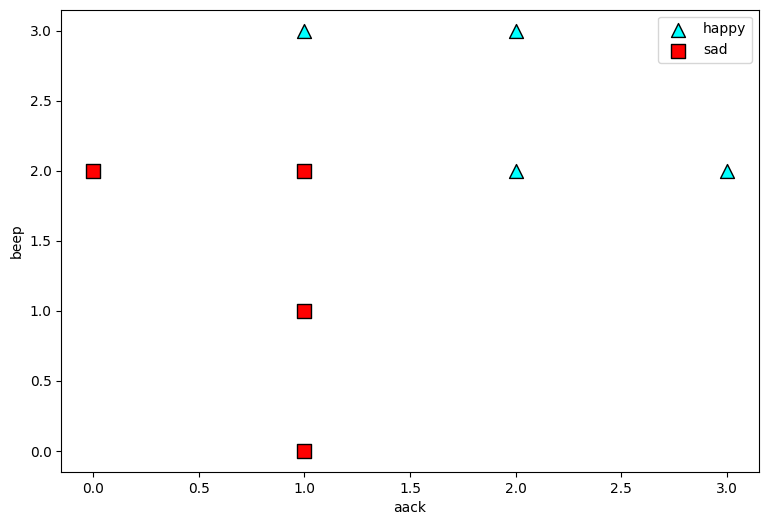

In [31]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [32]:
def sigmoid(x):
    output=1/(1+np.exp(-1*x))
    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    output=sigmoid(score(weights, bias, features))

    return output

def log_loss(weights, bias, features, label):
    output=(-1*label*np.log(prediction(weights, bias, features)))-((1-label)*np.log(1-prediction(weights, bias, features)))
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [33]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    weights=weights+learning_rate*(label-prediction(weights, bias, features))*features
    bias=bias+learning_rate*(label-prediction(weights, bias, features))

    return weights, bias

In [36]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

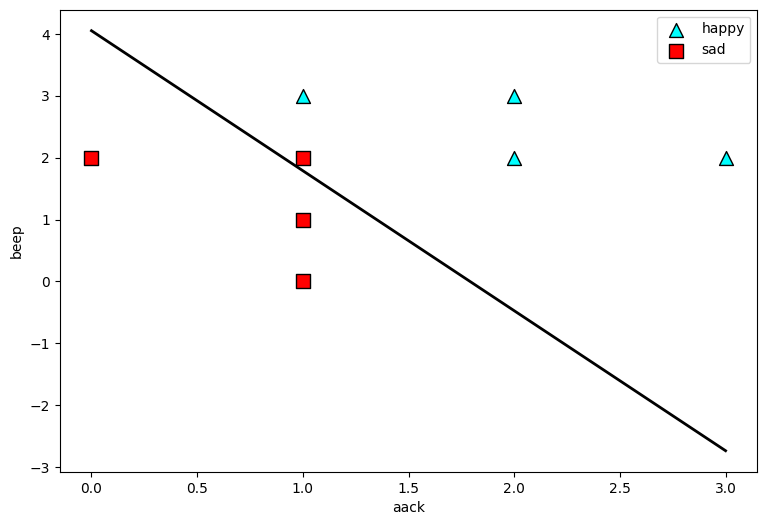

(array([0.85234498, 0.37694879]), -1.5263931836850702)

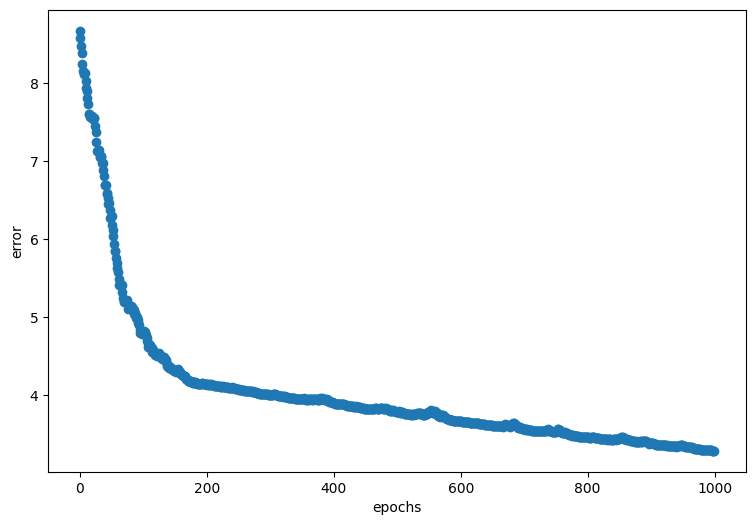

In [37]:
logistic_regression_algorithm(features, labels)

# Logistic SKlearn

In [14]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(loss="log_loss",tol=None)
clf.fit(features, labels)

SGDClassifier(loss='log_loss', tol=None)

In [15]:
clf.score(features, labels)

1.0

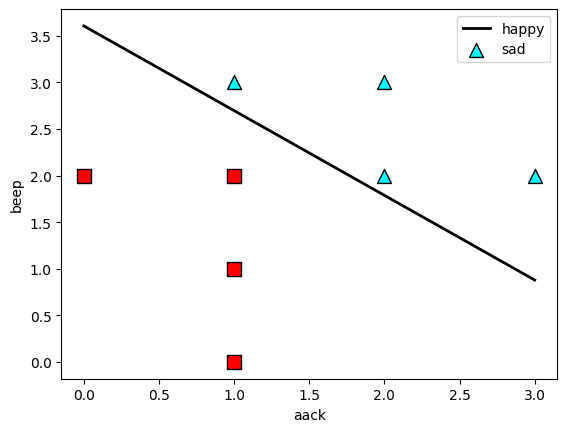

In [16]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()

### Real Example (Breast Cancer)

In [ ]:
!pip install -q seaborn

In [17]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [18]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [19]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_poinits_mean  \
0          0.11840           0.27760          0.3001               0.14710   
1          0.08474           0.07864          0.0869               0.07017   
2          0.10960           0.15990          0.1974               0.12790   
3          0.14250           0.28390          0.2414               0.10520   
4          0.10030           0.13280          0.1980               0.10430   

   ...  radius_largest  texture_largest  perimeter_largest  area_largest  \
0  ...           25.38            17.33             184.60        2019.0   
1  ...           24.99            23.41             158.80        1956.0   
2  ...           23.57            25.53             152.50        1709.0   
3  ...           14.91            26.50              98.87         567.7   
4  ...           22.54            16.67             152.20        1575.0   

   smoothness_largest  compactness_largest  concavity_largest  \
0              0.1622               0.6656             0.7119   
1              0.1238               0.1866             0.2416   
2              0.1444               0.4245             0.4504   
3              0.2098               0.8663             0.6869   
4              0.1374               0.2050             0.4000   

   concave_poinits_largest  symmetry_largest  fractal_dimension_largest  
0                   0.2654            0.4601                    0.11890  
1                   0.1860            0.2750                    0.08902  
2                   0.2430            0.3613                    0.08758  
3                   0.2575            0.6638                    0.17300  
4                   0.1625            0.2364                    0.07678  

[5 rows x 32 columns]

In [20]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [21]:
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})

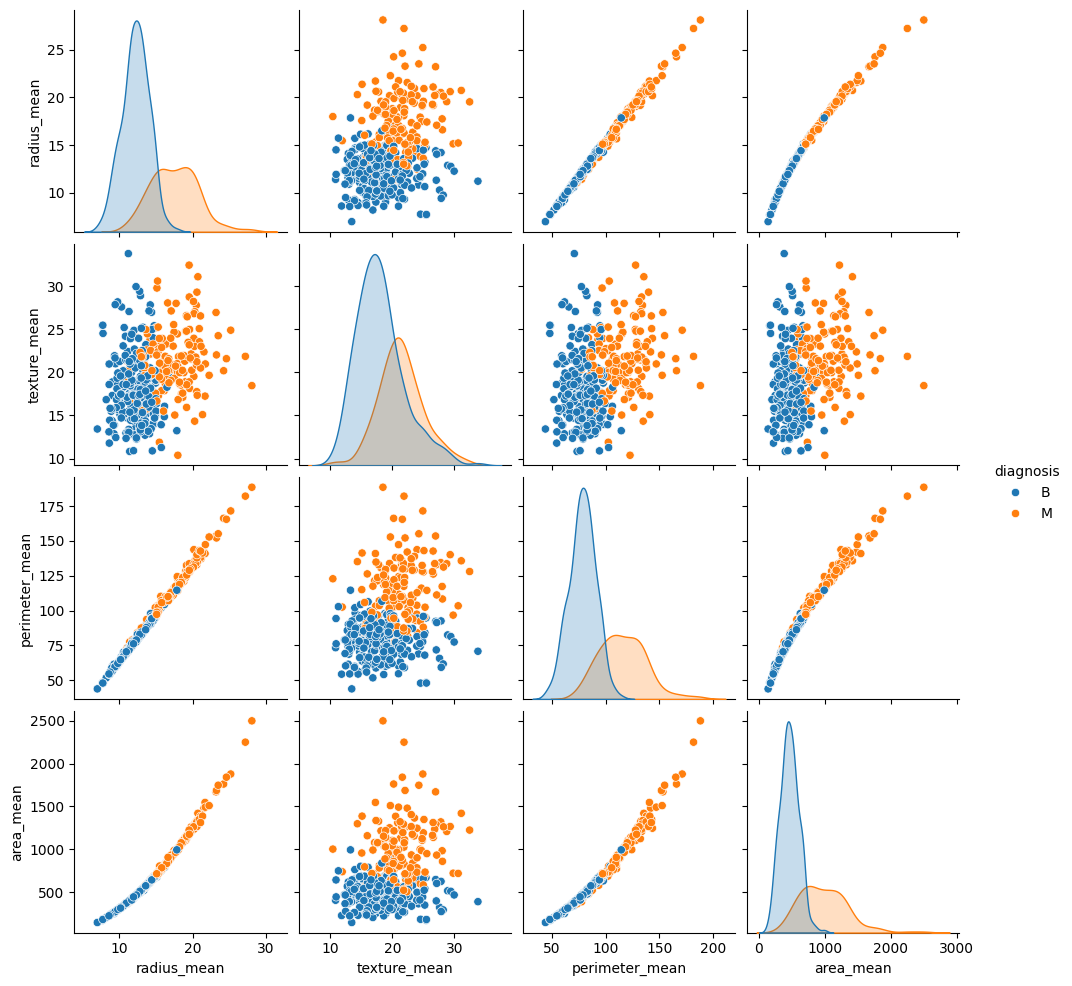

In [22]:
sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'diagnosis');

In [42]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss="log_loss",tol=None)
X_train=np.array(x_train["radius_mean"]).reshape(-1,1)
X_test=np.array(x_test["radius_mean"]).reshape(-1,1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8802816901408451

In [43]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss="log_loss",tol=None)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8450704225352113

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train)
model=SGDClassifier(loss="log_loss",tol=None)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9507042253521126